# Mapping

In [450]:
# importing libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
from fiona.crs import from_epsg
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import urllib
import json
from io import BytesIO
import requests
from sodapy import Socrata
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import contextily as ctx

Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

In [451]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [452]:
%watermark -v -p numpy,pandas,geopandas,matplotlib.pyplot,json,requests,sodapy

CPython 3.7.1
IPython 7.18.1

numpy 1.19.2
pandas 1.0.0
geopandas 0.8.1
matplotlib.pyplot 3.3.2
json 2.0.9
requests 2.24.0
sodapy 2.0.0


Documention for installing watermark: https://github.com/rasbt/watermark

In [453]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Reading and Writing Files

In [454]:
# Reading in GeoJSON
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [455]:
# Reading in shapefile inside a zip folder
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0  b'15K001 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K001   
1  b'17K002 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K002   
2  b'21K095 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K095   
3  b'21K096 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K096   
4  b'21K097 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K097   

               SCHOOLNAME                         SCH_TYPE  MANAGED_BY  \
0     P.S. 001 THE BERGEN                       Elementary           1   
1                M.S. 002  Junior High-Intermediate-Middle           1   
2  P.S. 095 THE GRAVESEND                              K-8           1   
3       I.S. 096 SETH LOW  Junior High-Intermediate-Middle           1   
4    P.S. 97 THE HIGHLAWN                       Elementary           1   

   GEO_DISTRI  ADMIN_DIST                 ADDRESS STATE_CODE    ZIP  \
0          15          15           309 47 STREET         NY  11220   
1          17          17     655 PARKSIDE AVENUE         NY  11226   
2          21          21  345 VAN SICKLEN STREET         NY  11223   
3          21          21             99 AVENUE P         NY  11204   
4          21          21   1855 STILLWELL AVENUE         NY  11223   

                PRINCIPAL       PRIN_PH           FAX  \
0        Jennifer Eusanio  718-567-7661  718-567-9771   
1        ADRIENNE SPENCER  718-462-6992  718-284-7717   
2           Janet Ndzibah  718-449-5050  718-449-3047   
3  Denise Sandra Levinsky  718-236-1344  718-236-2397   
4       KRISTINE MUSTILLO  718-372-7393  718-372-3842   

                             GRADES      City                       geometry  
0           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (980985.054 175780.759)  
1                       06,07,08,SE  BROOKLYN  POINT (997785.136 178431.911)  
2  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN  POINT (991224.983 156323.361)  
3                       06,07,08,SE  BROOKLYN  POINT (988439.681 160709.993)  
4           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (988205.073 158329.591)

In [456]:
ls data/

nta_shape.cpg      nta_shape.geojson  nta_shape.shp
nta_shape.dbf      nta_shape.prj      nta_shape.shx


In [457]:
# Writing to Shapefile:
nta_shape.to_file("data/nta_shape.shp")

# Writing to GeoJSON:
nta_shape.to_file("data/nta_shape.geojson", driver='GeoJSON')

In [458]:
ls data/

nta_shape.cpg      nta_shape.geojson  nta_shape.shp
nta_shape.dbf      nta_shape.prj      nta_shape.shx


# Basic Attributes

In [459]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [460]:
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [461]:
nta_shape.geometry.name

'geometry'

In [462]:
nta_shape.area

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0     0.001
1     0.001
2     0.000
3     0.000
4     0.000
       ... 
190   0.002
191   0.001
192   0.000
193   0.001
194   0.003
Length: 195, dtype: float64

In [463]:
nta_shape.bounds

minx   miny    maxx   maxy
0   -74.007 40.613 -73.973 40.645
1   -73.827 40.758 -73.790 40.780
2   -73.876 40.757 -73.854 40.772
3   -73.959 40.638 -73.946 40.656
4   -73.772 40.702 -73.750 40.720
..      ...    ...     ...    ...
190 -74.025 40.577 -73.834 40.709
191 -73.849 40.681 -73.811 40.704
192 -73.816 40.691 -73.768 40.716
193 -73.941 40.542 -73.815 40.615
194 -73.928 40.556 -73.734 40.783

[195 rows x 4 columns]

In [464]:
nta_shape.total_bounds

array([-74.25559136,  40.4961154 , -73.70000906,  40.91553278])

In [465]:
nta_shape.geom_type

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
3      MultiPolygon
4      MultiPolygon
           ...     
190    MultiPolygon
191    MultiPolygon
192    MultiPolygon
193    MultiPolygon
194    MultiPolygon
Length: 195, dtype: object

In [466]:
nta_shape.is_valid

0      True
1      True
2      True
3      True
4      True
       ... 
190    True
191    True
192    True
193    True
194    True
Length: 195, dtype: bool

# Basic Methods

In [467]:
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0  b'15K001 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K001   
1  b'17K002 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K002   
2  b'21K095 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K095   
3  b'21K096 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K096   
4  b'21K097 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K097   

               SCHOOLNAME                         SCH_TYPE  MANAGED_BY  \
0     P.S. 001 THE BERGEN                       Elementary           1   
1                M.S. 002  Junior High-Intermediate-Middle           1   
2  P.S. 095 THE GRAVESEND                              K-8           1   
3       I.S. 096 SETH LOW  Junior High-Intermediate-Middle           1   
4    P.S. 97 THE HIGHLAWN                       Elementary           1   

   GEO_DISTRI  ADMIN_DIST                 ADDRESS STATE_CODE    ZIP  \
0          15          15           309 47 STREET         NY  11220   
1          17          17     655 PARKSIDE AVENUE         NY  11226   
2          21          21  345 VAN SICKLEN STREET         NY  11223   
3          21          21             99 AVENUE P         NY  11204   
4          21          21   1855 STILLWELL AVENUE         NY  11223   

                PRINCIPAL       PRIN_PH           FAX  \
0        Jennifer Eusanio  718-567-7661  718-567-9771   
1        ADRIENNE SPENCER  718-462-6992  718-284-7717   
2           Janet Ndzibah  718-449-5050  718-449-3047   
3  Denise Sandra Levinsky  718-236-1344  718-236-2397   
4       KRISTINE MUSTILLO  718-372-7393  718-372-3842   

                             GRADES      City                       geometry  
0           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (980985.054 175780.759)  
1                       06,07,08,SE  BROOKLYN  POINT (997785.136 178431.911)  
2  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN  POINT (991224.983 156323.361)  
3                       06,07,08,SE  BROOKLYN  POINT (988439.681 160709.993)  
4           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (988205.073 158329.591)

In [468]:
school_points.distance(nta_shape.to_crs(epsg=2263))

/Users/geribauer/anaconda3/lib/python3.7/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0       4351.212
1      51984.788
2      64817.990
3      14146.470
4      71178.727
          ...   
1704         nan
1705         nan
1706         nan
1707         nan
1708         nan
Length: 1709, dtype: float64

In [469]:
nta_shape.centroid

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0      POINT (-73.98866 40.63095)
1      POINT (-73.80955 40.76835)
2      POINT (-73.86840 40.76335)
3      POINT (-73.95162 40.64612)
4      POINT (-73.76114 40.71064)
                  ...            
190    POINT (-73.91960 40.62311)
191    POINT (-73.83093 40.69454)
192    POINT (-73.79398 40.70437)
193    POINT (-73.87620 40.57164)
194    POINT (-73.83211 40.68976)
Length: 195, dtype: geometry

In [470]:
nta_shape.representative_point()

0      POINT (-73.98956 40.62861)
1      POINT (-73.80888 40.76894)
2      POINT (-73.86841 40.76395)
3      POINT (-73.95221 40.64725)
4      POINT (-73.76157 40.71109)
                  ...            
190    POINT (-73.89615 40.59313)
191    POINT (-73.82903 40.69297)
192    POINT (-73.80035 40.70325)
193    POINT (-73.92328 40.55535)
194    POINT (-73.87597 40.69576)
Length: 195, dtype: geometry

In [471]:
print("old crs " + str(nta_shape.crs))
print("new crs " + str(nta_shape.to_crs(epsg=2263).crs))

old crs epsg:4326
new crs epsg:2263


<AxesSubplot:>

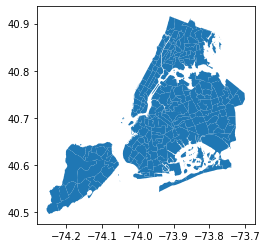

In [472]:
nta_shape.plot()

In [473]:
nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

## Create centroids from polygons

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


<AxesSubplot:>

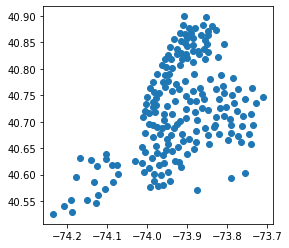

In [474]:
nta_shape['centroid_column'] = nta_shape.centroid

nta_shape = nta_shape.set_geometry('centroid_column')

nta_shape.plot()

In [475]:
nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  \
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...   
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...   
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...   
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...   
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...   

              centroid_column  
0  POINT (-73.98866 40.63095)  
1  POINT (-73.80955 40.76835)  
2  POINT (-73.86840 40.76335)  
3  POINT (-73.95162 40.64612)  
4  POINT (-73.76114 40.71064)

# Geometric Objects - Polygons, Lines, and Points

## Polygons

In [476]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

<AxesSubplot:>

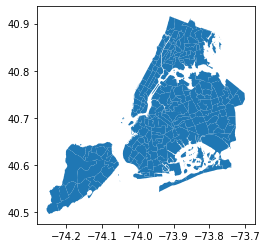

In [477]:
nta_shape.plot()

(905464.73902893, 1075092.8785858138, 112485.76062387296, 280480.4146435305)

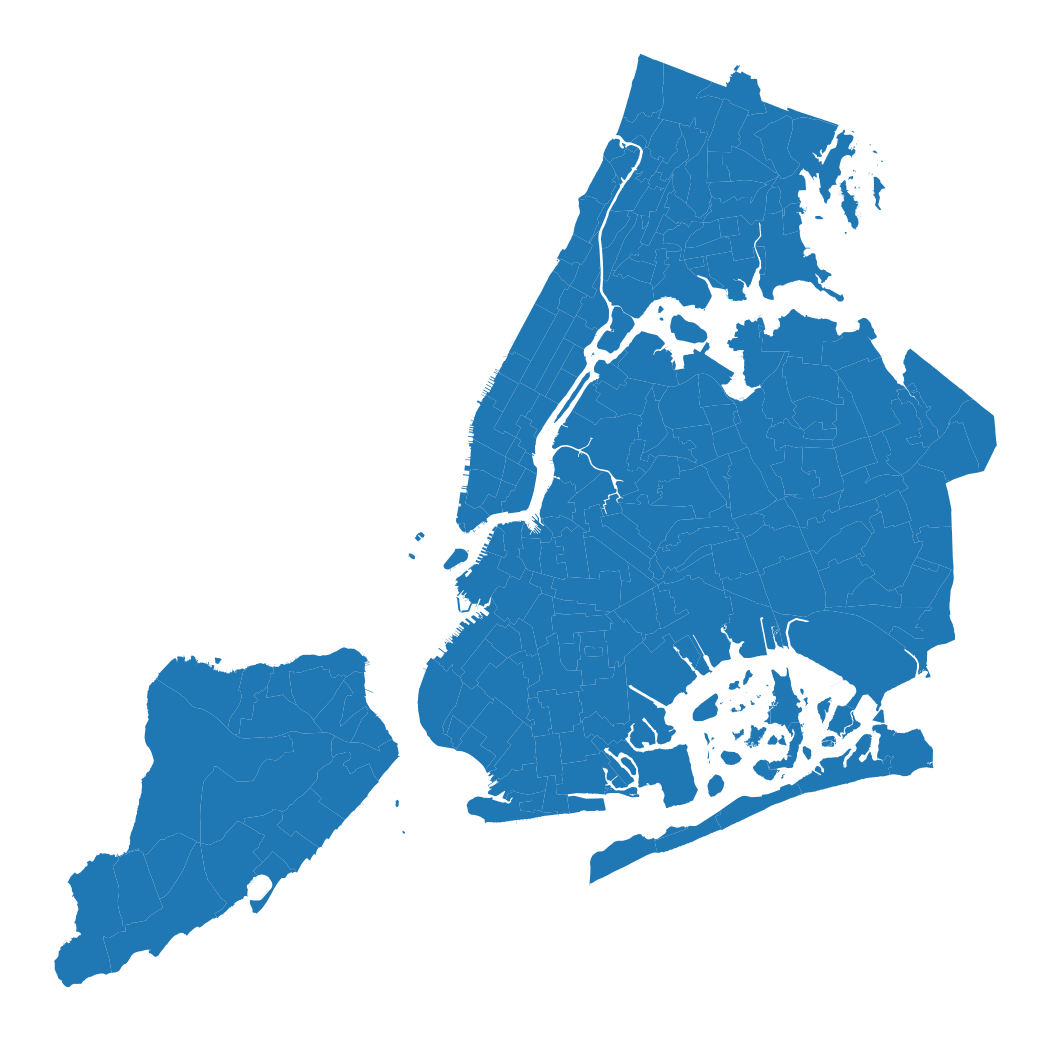

In [478]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

nta_shape = nta_shape.to_crs(epsg=2263) # converting to more accurate coordinate referance system
nta_shape.plot(ax=ax, 
               color='#1f77b4') # plotting geodataframe as color blue
plt.tight_layout() # formatting a tight layout for our plot
plt.axis('off') # turning off figure axis

## Lines

In [479]:
url = 'https://data.cityofnewyork.us/api/geospatial/exjm-f27b?method=export&format=GeoJSON'
streets = gpd.read_file(url)

streets.head()

rw_type l_low_hn pre_direct st_width  r_zip r_low_hn bike_lane post_type  \
0       6     None       None        0  10458     None      None       TRL   
1       1  215-001       None       35  11360  215-000      None       AVE   
2       1     5631       None       42  10471     5602      None       AVE   
3       1      317       None       50  11217      316         2        ST   
4       1  120-011       None       40  11415        0      None      BLVD   

   r_blkfc_id bike_trafd  ... snow_pri borocode trafdir pre_modifi  \
0           0       None  ...     None        2      NV       None   
1   112262650       None  ...        S        4      TW       None   
2  1522601877       None  ...        H        2      TW       None   
3  1922612977         TW  ...        C        3      TW       None   
4    92269521       None  ...        C        4      TF       None   

                      st_label physicalid                  st_name  \
0  MITSUBISHI WILD WETLAND TRL     164809  MITSUBISHI WILD WETLAND   
1                       28 AVE       6110                       28   
2                ARLINGTON AVE      61140                ARLINGTON   
3              SCHERMERHORN ST     145494             SCHERMERHORN   
4                  QUEENS BLVD      12438                   QUEENS   

               created l_high_hn  \
0  2014-08-19T00:00:00      None   
1  2007-11-29T00:00:00   215-027   
2  2007-11-29T00:00:00      5699   
3  2007-11-29T00:00:00       399   
4  2007-11-29T00:00:00   120-011   

                                            geometry  
0  MULTILINESTRING ((-73.87862 40.86192, -73.8786...  
1  MULTILINESTRING ((-73.77290 40.77780, -73.7720...  
2  MULTILINESTRING ((-73.90711 40.90519, -73.9067...  
3  MULTILINESTRING ((-73.98182 40.68733, -73.9805...  
4  MULTILINESTRING ((-73.83002 40.71401, -73.8298...  

[5 rows x 32 columns]

<AxesSubplot:>

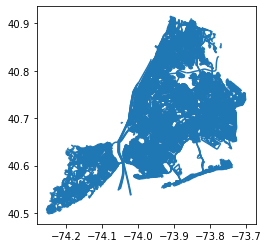

In [480]:
streets.plot()

(905650.6073791477, 1075080.906658936, 113170.08619376768, 280284.1900511943)

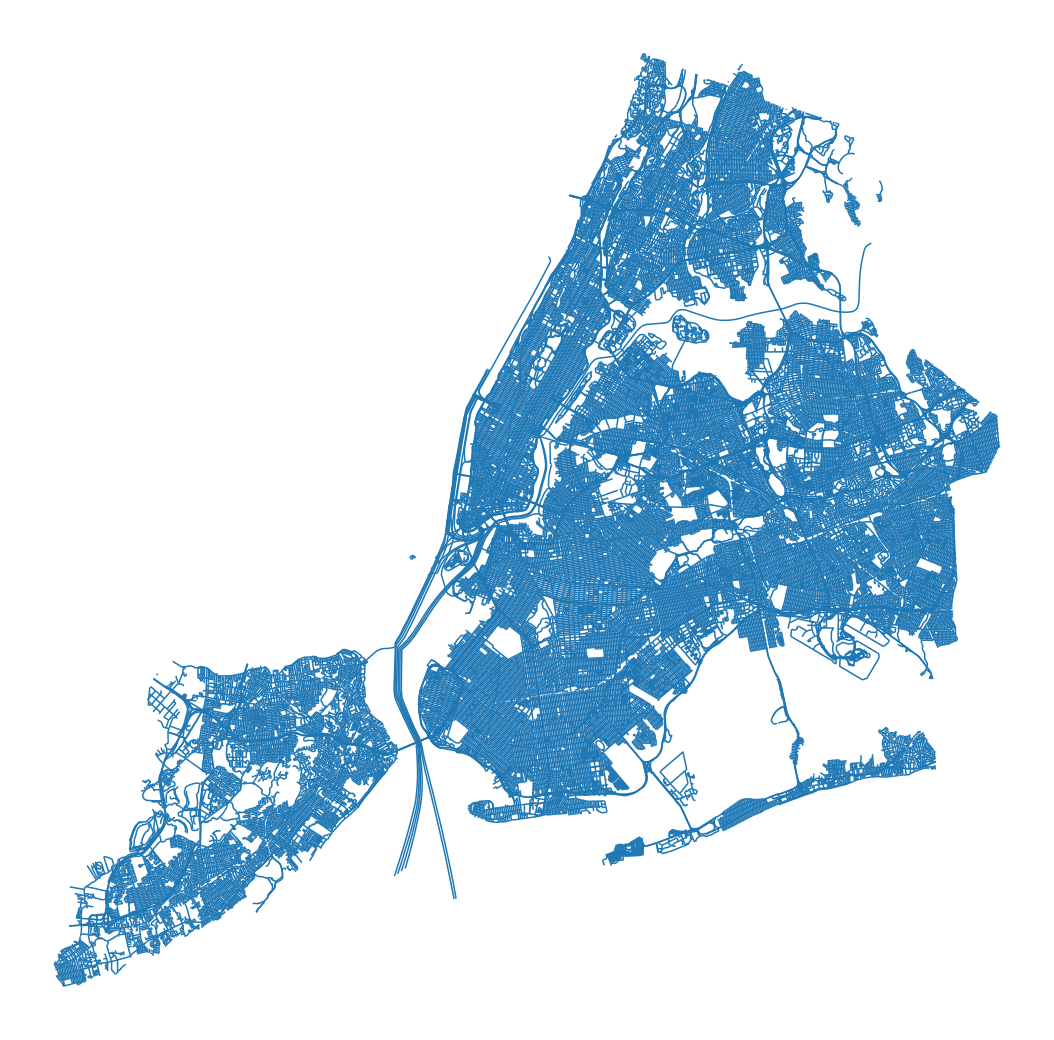

In [481]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

streets = streets.to_crs(epsg=2263) # converting to more accurate coordinate referance system
streets.plot(ax=ax, color='#1f77b4') # plotting geodataframe as color blue
plt.tight_layout() # formatting a tight layout for our plot
plt.axis('off') # turning off figure axis

## Points

In [482]:
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0  b'15K001 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K001   
1  b'17K002 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K002   
2  b'21K095 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K095   
3  b'21K096 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K096   
4  b'21K097 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K097   

               SCHOOLNAME                         SCH_TYPE  MANAGED_BY  \
0     P.S. 001 THE BERGEN                       Elementary           1   
1                M.S. 002  Junior High-Intermediate-Middle           1   
2  P.S. 095 THE GRAVESEND                              K-8           1   
3       I.S. 096 SETH LOW  Junior High-Intermediate-Middle           1   
4    P.S. 97 THE HIGHLAWN                       Elementary           1   

   GEO_DISTRI  ADMIN_DIST                 ADDRESS STATE_CODE    ZIP  \
0          15          15           309 47 STREET         NY  11220   
1          17          17     655 PARKSIDE AVENUE         NY  11226   
2          21          21  345 VAN SICKLEN STREET         NY  11223   
3          21          21             99 AVENUE P         NY  11204   
4          21          21   1855 STILLWELL AVENUE         NY  11223   

                PRINCIPAL       PRIN_PH           FAX  \
0        Jennifer Eusanio  718-567-7661  718-567-9771   
1        ADRIENNE SPENCER  718-462-6992  718-284-7717   
2           Janet Ndzibah  718-449-5050  718-449-3047   
3  Denise Sandra Levinsky  718-236-1344  718-236-2397   
4       KRISTINE MUSTILLO  718-372-7393  718-372-3842   

                             GRADES      City                       geometry  
0           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (980985.054 175780.759)  
1                       06,07,08,SE  BROOKLYN  POINT (997785.136 178431.911)  
2  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN  POINT (991224.983 156323.361)  
3                       06,07,08,SE  BROOKLYN  POINT (988439.681 160709.993)  
4           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (988205.073 158329.591)

<AxesSubplot:>

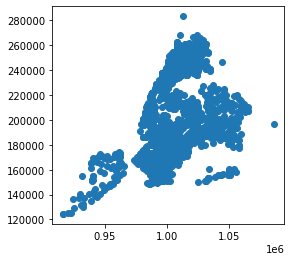

In [483]:
school_points.plot()

(907923.4919270311, 1094296.2593642443, 116536.22718050248, 291270.9651156455)

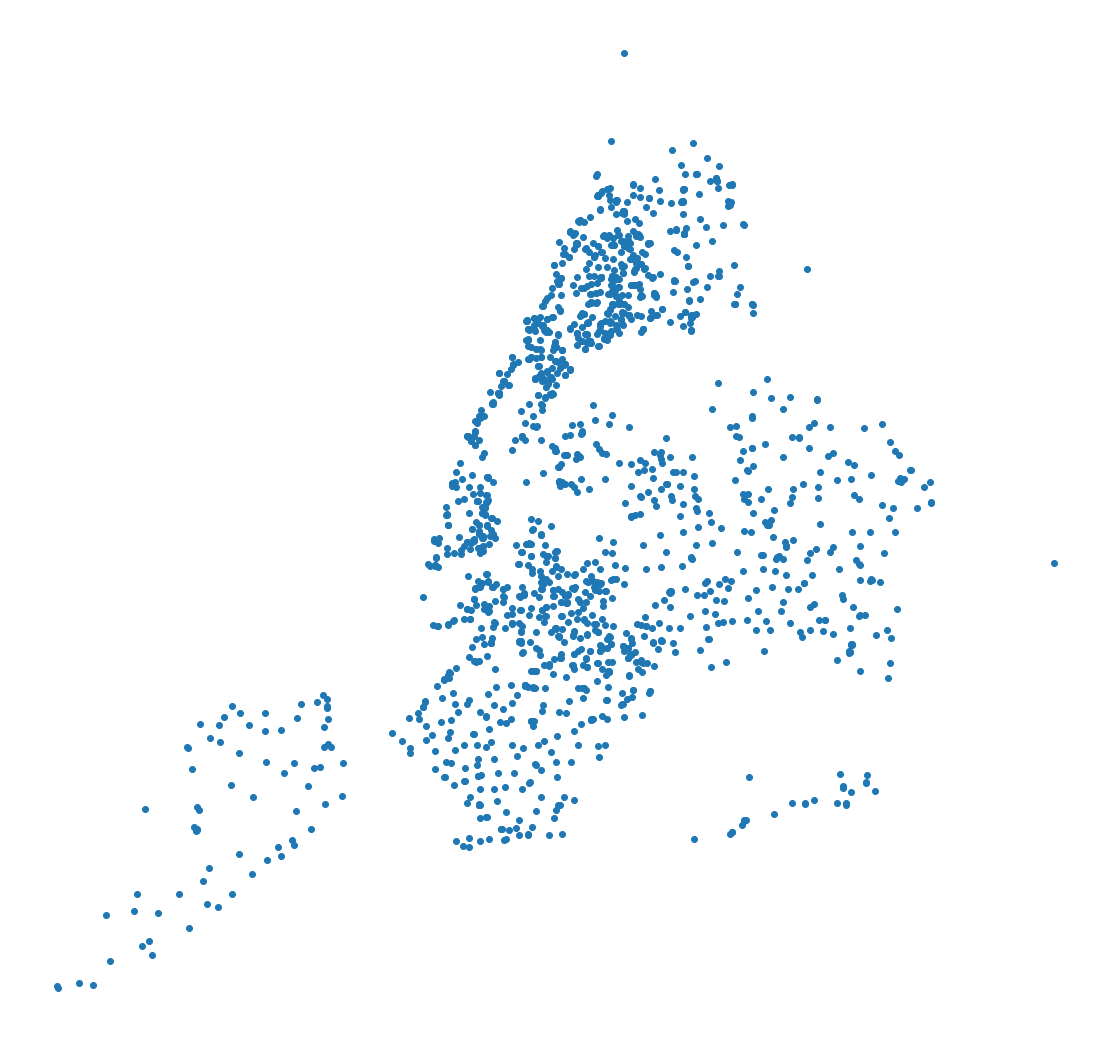

In [484]:
fig, ax = plt.subplots(figsize=(20,15)) # creating a figure

school_points = school_points.to_crs(epsg=2263) # converting to more accurate coordinate referance system
school_points.plot(ax=ax, 
                   color='#1f77b4') # plotting geodataframe as color blue
plt.tight_layout() # formatting a tight layout for our plot
plt.axis('off') # turning off figure axis

# Maps with layers

(904542.6259624638, 1094457.2529816048, 111961.55147280241, 291488.8068160122)

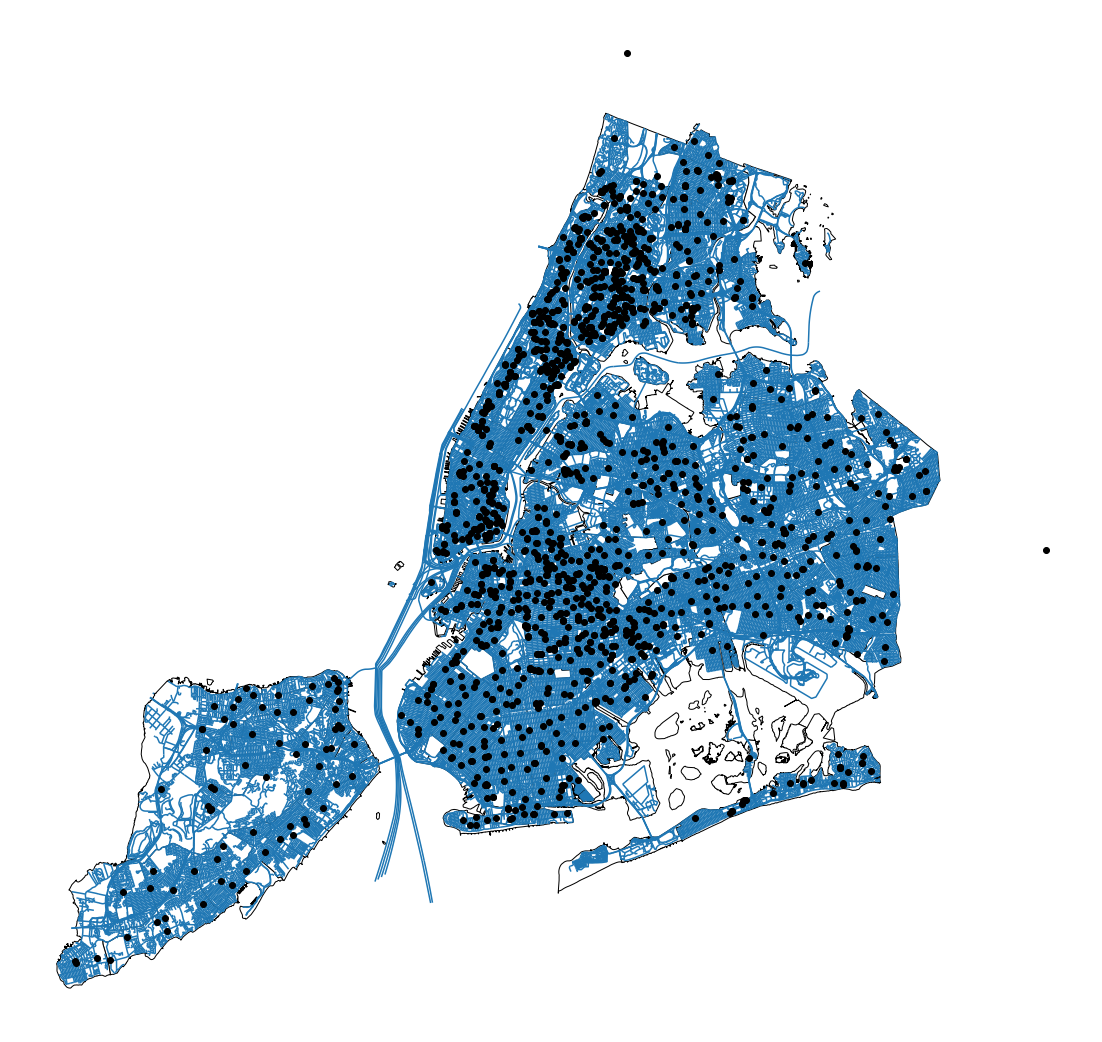

In [485]:
fig, ax = plt.subplots(figsize=(20,15))

ax.set_aspect('equal')

nta_shape.plot(ax=ax, 
               color='white', 
               edgecolor='black', 
               zorder=1)
streets.plot(ax=ax, 
             zorder=2)
school_points.plot(ax=ax, 
                   color='black', 
                   zorder=3)

plt.tight_layout()
plt.axis('off')

# Adding background map to plots

(904542.6259624638, 1094457.2529816048, 111961.55147280241, 291488.8068160122)

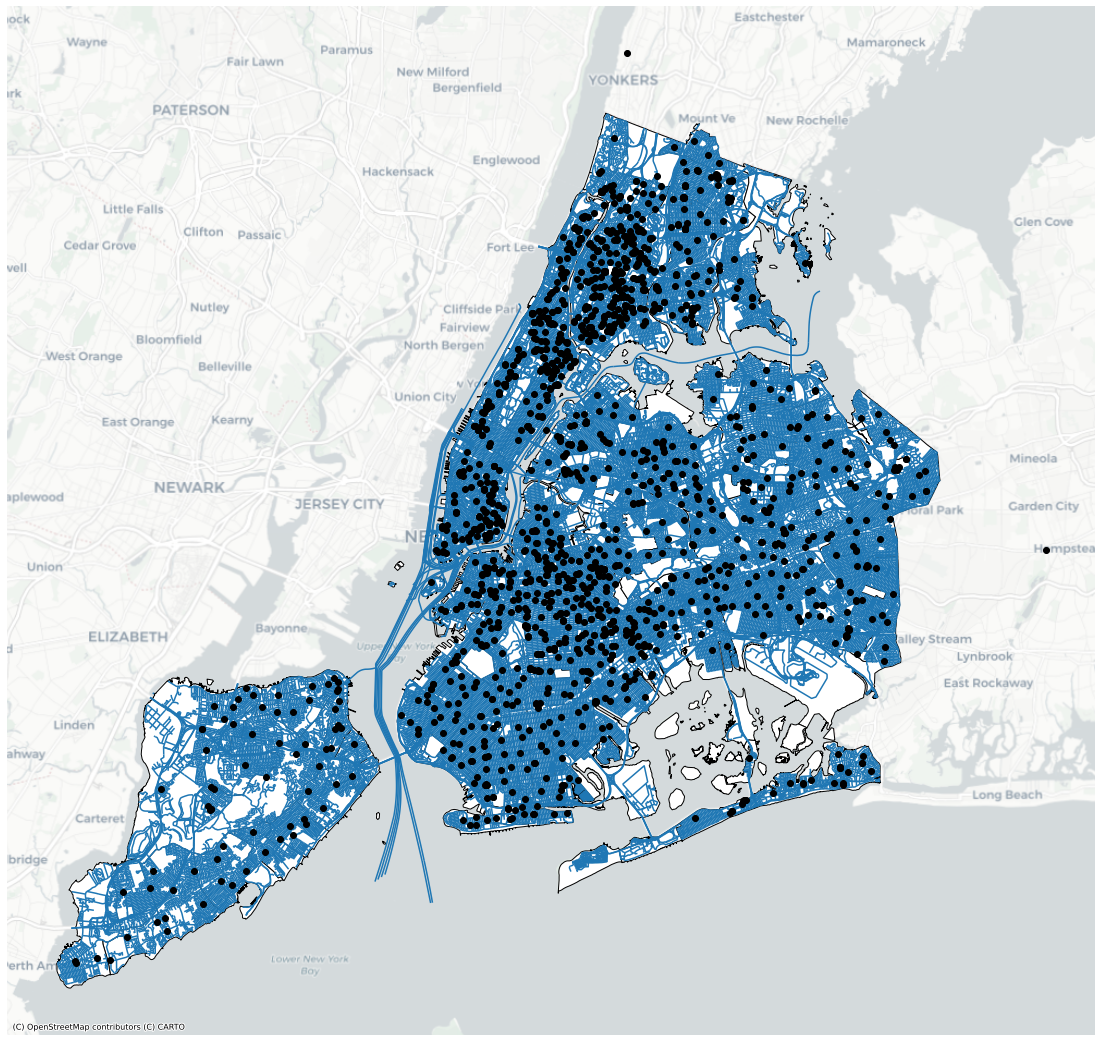

In [486]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_aspect('equal')

nta_shape.plot(ax=ax, 
               color='white', 
               edgecolor='black', 
               zorder=1)
streets.plot(ax=ax, 
             zorder=2)
school_points.plot(ax=ax, 
                   color='black', 
                   zorder=3)

ctx.add_basemap(ax, 
                crs=2263, 
                source=ctx.providers.CartoDB.Positron)

plt.tight_layout()
plt.axis('off')

# Clip Data

(904542.6259624638, 1094457.2529816048, 111961.55147280241, 291488.8068160122)

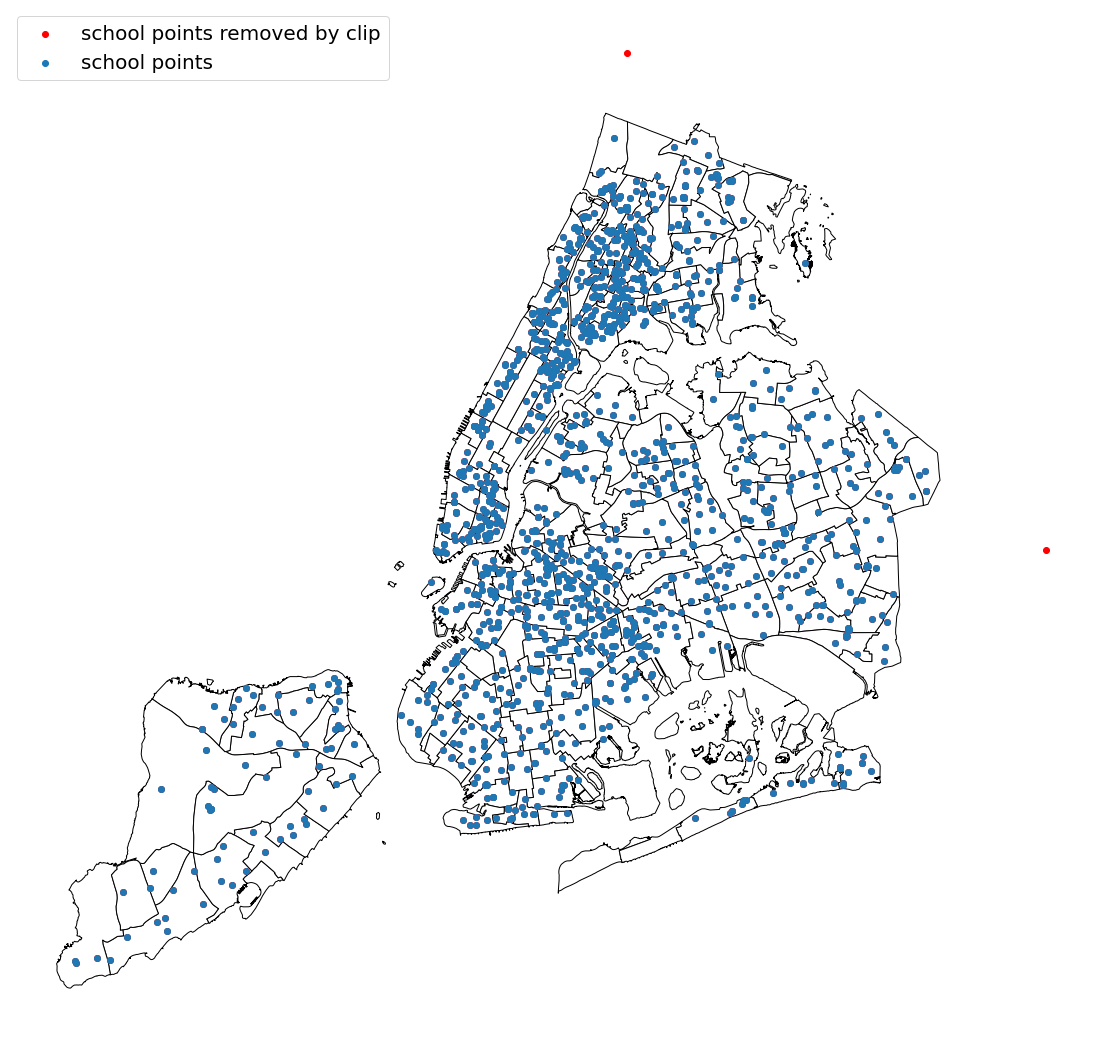

In [487]:
school_points_clipped = gpd.clip(school_points, nta_shape)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_aspect('equal')

nta_shape.plot(ax=ax, 
               color="white", 
               edgecolor='black', 
               zorder=1)                                
school_points.plot(ax=ax, 
                   color='red', 
                   zorder=2)
school_points_clipped.plot(ax=ax, 
                           color='#1f77b4', 
                           zorder=3)

plt.legend(['school points removed by clip', 'school points'], 
           loc='upper left', 
           fontsize=20)
plt.tight_layout()
plt.axis('off')

# Choropleth Maps

In [488]:
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

nyc_pop.head()

Borough  Year  FIPS County Code NTA Code                         NTA Name  \
0   Bronx  2000                 5     BX01               Claremont-Bathgate   
1   Bronx  2000                 5     BX03  Eastchester-Edenwald-Baychester   
2   Bronx  2000                 5     BX05       Bedford Park-Fordham North   
3   Bronx  2000                 5     BX06                          Belmont   
4   Bronx  2000                 5     BX07                        Bronxdale   

   Population  
0       28149  
1       35422  
2       55329  
3       25967  
4       34309

In [489]:
nyc_pop['Year'].unique()

array([2000, 2010])

In [490]:
nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

In [491]:
nyc_pop['Year'].unique()

array([2010])

In [492]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [493]:
nta_pop = nta_shape.merge(nyc_pop, 
                          left_on='ntacode', 
                          right_on='NTA Code', 
                          how='inner')

In [494]:
nta_pop.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  Brooklyn   
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...    Queens   
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...    Queens   
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  Brooklyn   
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population  
0  2010                47     BK88   Borough Park      106357  
1  2010                81     QN51    Murray Hill       51739  
2  2010                81     QN27  East Elmhurst       23150  
3  2010                47     BK95        Erasmus       29938  
4  2010                81     QN07         Hollis       20269

In [495]:
nta_pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [496]:
nta_pop.to_crs(epsg=2263, inplace=True)
nta_pop.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [497]:
nta_pop['ft_sq'] = nta_pop.area
nta_pop.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
1         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
2         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...    Queens   
3         3  MULTIPOLYGON (((998608.334 171942.436, 998339....  Brooklyn   
4         4  MULTIPOLYGON (((1051539.660 201007.013, 105192...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population        ft_sq  
0  2010                47     BK88   Borough Park      106357 54005019.048  
1  2010                81     QN51    Murray Hill       51739 52488277.591  
2  2010                81     QN27  East Elmhurst       23150 19726946.569  
3  2010                47     BK95        Erasmus       29938 14522603.592  
4  2010                81     QN07         Hollis       20269 22887772.809

In [498]:
nta_pop['mi_sq'] = nta_pop['ft_sq'] / 27878400

nta_pop.head()   

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
1         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
2         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...    Queens   
3         3  MULTIPOLYGON (((998608.334 171942.436, 998339....  Brooklyn   
4         4  MULTIPOLYGON (((1051539.660 201007.013, 105192...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population        ft_sq  \
0  2010                47     BK88   Borough Park      106357 54005019.048   
1  2010                81     QN51    Murray Hill       51739 52488277.591   
2  2010                81     QN27  East Elmhurst       23150 19726946.569   
3  2010                47     BK95        Erasmus       29938 14522603.592   
4  2010                81     QN07         Hollis       20269 22887772.809   

   mi_sq  
0  1.937  
1  1.883  
2  0.708  
3  0.521  
4  0.821

In [499]:
nta_pop['density (pop/mi_sq)'] = nta_pop['Population'] / nta_pop['mi_sq']

In [500]:
nta_pop.sort_values(by='density (pop/mi_sq)', ascending=False).iloc[:5,-6:]

NTA Code         NTA Name  Population        ft_sq  mi_sq  \
79      MN32        Yorkville       77942 13602039.796  0.488   
90      BX40    Fordham South       28262  6308875.236  0.226   
126     MN22     East Village       44136 10894242.599  0.391   
61      MN14   Lincoln Square       61489 15805523.623  0.567   
87      MN12  Upper West Side      132378 34379942.456  1.233   

     density (pop/mi_sq)  
79            159747.971  
90            124887.450  
126           112944.158  
61            108456.700  
87            107344.183

<AxesSubplot:>

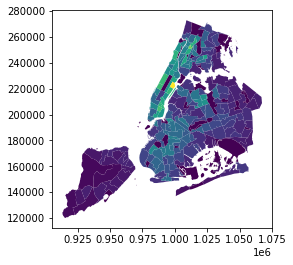

In [501]:
nta_pop.plot(column='density (pop/mi_sq)')

(905464.73902893, 1075092.8785858138, 112485.76062387296, 280480.4146435305)

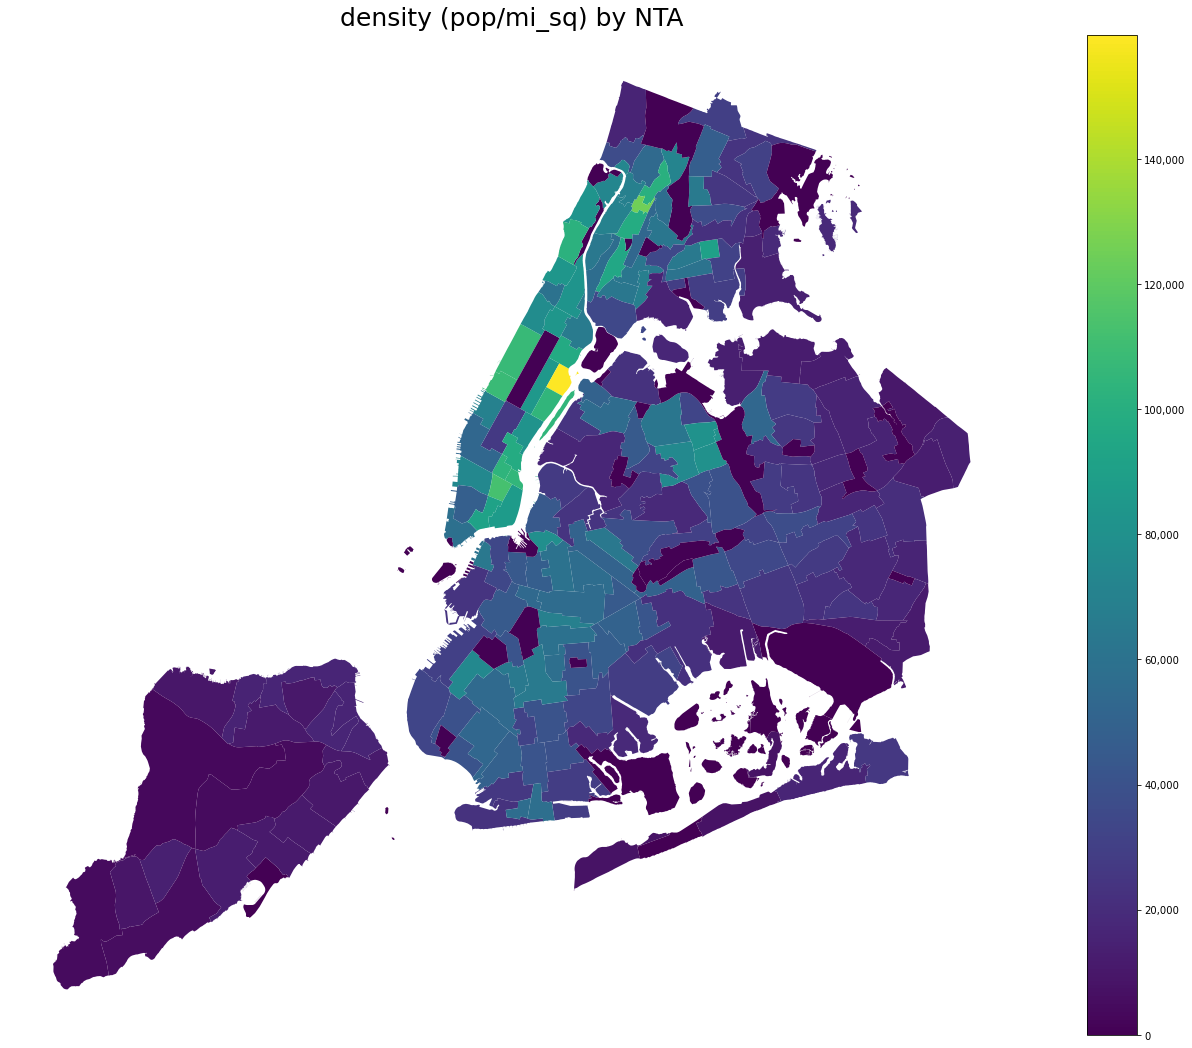

In [502]:
fig, ax = plt.subplots(figsize=(20,15))

comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

nta_pop.plot(column='density (pop/mi_sq)', 
             ax=ax, 
             legend=True,
             legend_kwds={'format':comma_fmt})

ax.set_title('density (pop/mi_sq) by NTA', 
             fontsize=25, 
             pad=10)

plt.tight_layout()
plt.axis('off')

(905464.73902893, 1075092.8785858138, 112485.76062387296, 280480.4146435305)

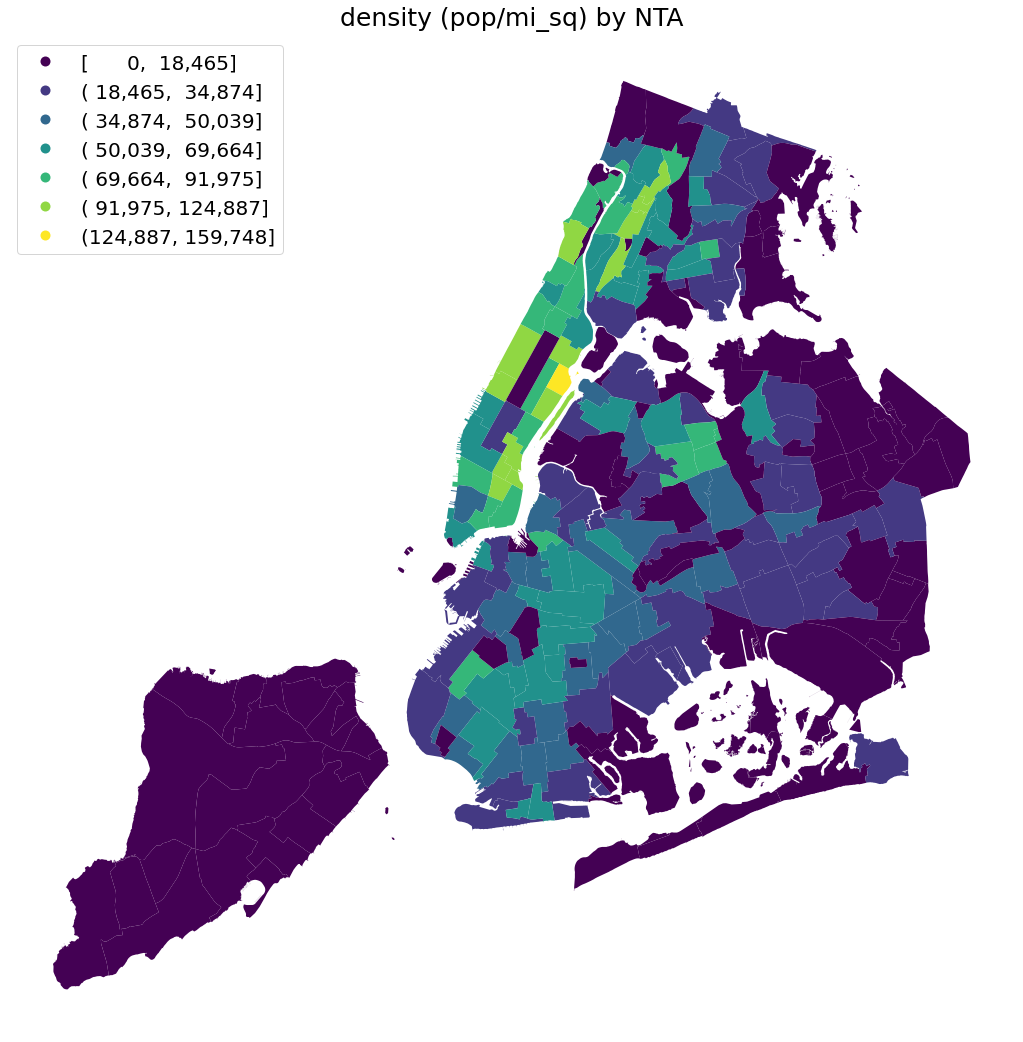

In [503]:
fig, ax = plt.subplots(figsize=(20,15))

nta_pop.plot(column='density (pop/mi_sq)', 
             ax=ax, 
             legend=True, 
             scheme='fisher_jenks',
             k = 7,
             legend_kwds={'loc': "upper left", 
                          'fmt': "{:,.0f}",
                          'fontsize': "20"})

ax.set_title('density (pop/mi_sq) by NTA', fontsize=25, pad=10)

plt.tight_layout()
plt.axis('off')

In [504]:
nta_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ntacode              195 non-null    object  
 1   shape_area           195 non-null    object  
 2   county_fips          195 non-null    object  
 3   ntaname              195 non-null    object  
 4   shape_leng           195 non-null    object  
 5   boro_name            195 non-null    object  
 6   boro_code            195 non-null    object  
 7   geometry             195 non-null    geometry
 8   Borough              195 non-null    object  
 9   Year                 195 non-null    int64   
 10  FIPS County Code     195 non-null    int64   
 11  NTA Code             195 non-null    object  
 12  NTA Name             195 non-null    object  
 13  Population           195 non-null    int64   
 14  ft_sq                195 non-null    float64 
 15  mi_sq          

# Joining Data

## Attribute Join

In [505]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [506]:
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

nyc_pop.head()

Borough  Year  FIPS County Code NTA Code                         NTA Name  \
0   Bronx  2000                 5     BX01               Claremont-Bathgate   
1   Bronx  2000                 5     BX03  Eastchester-Edenwald-Baychester   
2   Bronx  2000                 5     BX05       Bedford Park-Fordham North   
3   Bronx  2000                 5     BX06                          Belmont   
4   Bronx  2000                 5     BX07                        Bronxdale   

   Population  
0       28149  
1       35422  
2       55329  
3       25967  
4       34309

In [507]:
print(nyc_pop['Year'].unique())

nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

print(nyc_pop['Year'].unique())

[2000 2010]
[2010]


In [508]:
print(nta_shape['ntaname'].dtype)
print(nyc_pop['NTA Name'].dtype)

object
object


In [509]:
nta_with_pop = nta_shape.merge(nyc_pop, 
                               left_on='ntacode', 
                               right_on='NTA Code')

In [510]:
nta_with_pop.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  Brooklyn   
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...    Queens   
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...    Queens   
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  Brooklyn   
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population  
0  2010                47     BK88   Borough Park      106357  
1  2010                81     QN51    Murray Hill       51739  
2  2010                81     QN27  East Elmhurst       23150  
3  2010                47     BK95        Erasmus       29938  
4  2010                81     QN07         Hollis       20269

In [511]:
nta_with_pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [512]:
nta_with_pop.to_crs(epsg=2263, inplace=True)
nta_with_pop.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [513]:
nta_with_pop['ft_sq'] = nta_with_pop.area
nta_with_pop.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
1         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
2         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...    Queens   
3         3  MULTIPOLYGON (((998608.334 171942.436, 998339....  Brooklyn   
4         4  MULTIPOLYGON (((1051539.660 201007.013, 105192...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population        ft_sq  
0  2010                47     BK88   Borough Park      106357 54005019.048  
1  2010                81     QN51    Murray Hill       51739 52488277.591  
2  2010                81     QN27  East Elmhurst       23150 19726946.569  
3  2010                47     BK95        Erasmus       29938 14522603.592  
4  2010                81     QN07         Hollis       20269 22887772.809

In [514]:
nta_with_pop['mi_sq'] = nta_with_pop['ft_sq'] / 27878400

nta_with_pop.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
1         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
2         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...    Queens   
3         3  MULTIPOLYGON (((998608.334 171942.436, 998339....  Brooklyn   
4         4  MULTIPOLYGON (((1051539.660 201007.013, 105192...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population        ft_sq  \
0  2010                47     BK88   Borough Park      106357 54005019.048   
1  2010                81     QN51    Murray Hill       51739 52488277.591   
2  2010                81     QN27  East Elmhurst       23150 19726946.569   
3  2010                47     BK95        Erasmus       29938 14522603.592   
4  2010                81     QN07         Hollis       20269 22887772.809   

   mi_sq  
0  1.937  
1  1.883  
2  0.708  
3  0.521  
4  0.821

In [515]:
nta_with_pop['density (pop/mi_sq)'] = nta_with_pop['Population'] / nta_with_pop['mi_sq']

<AxesSubplot:>

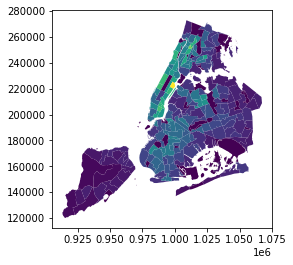

In [516]:
nta_with_pop.plot(column='density (pop/mi_sq)')

(905464.73902893, 1075092.8785858138, 112485.76062387296, 280480.4146435305)

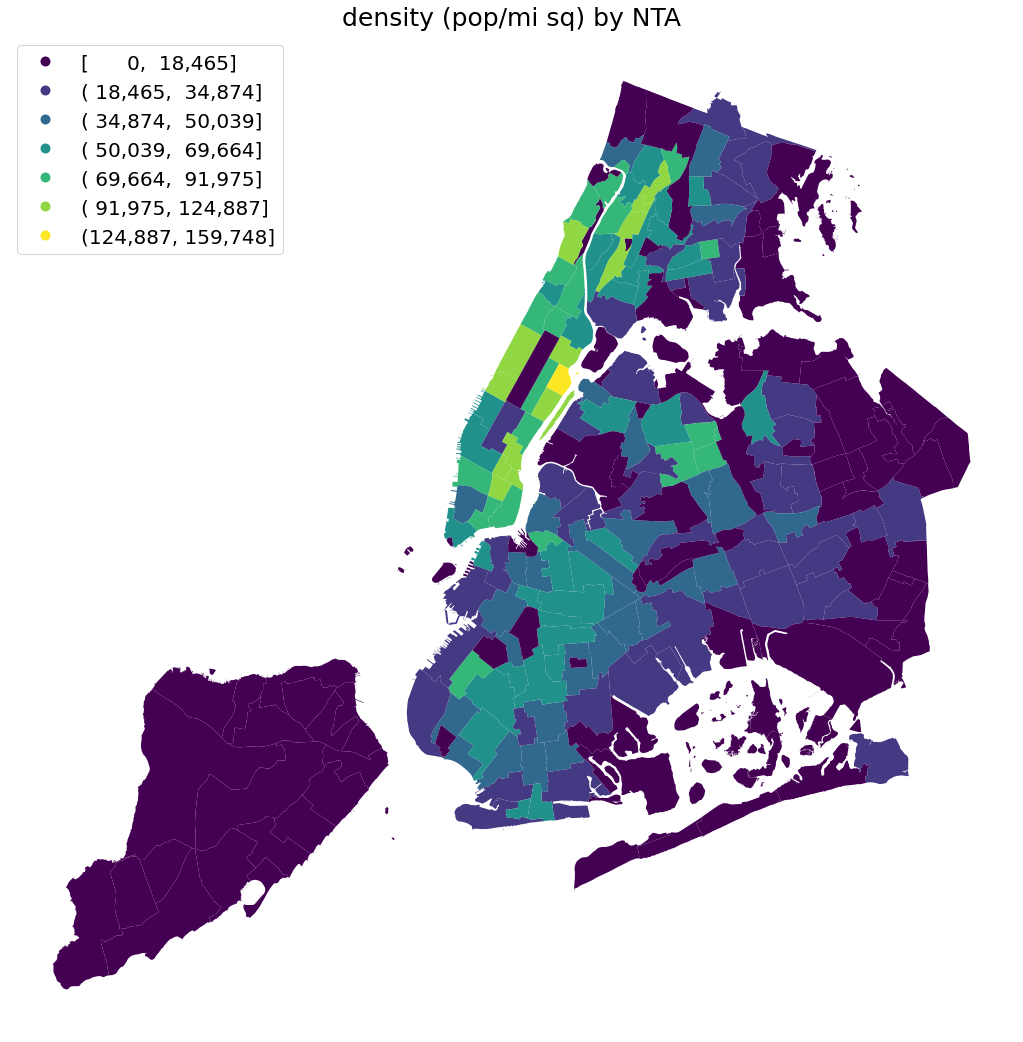

In [517]:
fig, ax = plt.subplots(figsize=(20,15))

nta_with_pop.plot(column='density (pop/mi_sq)', 
             ax=ax, 
             legend=True, 
             scheme='fisher_jenks',
             k = 7,
             legend_kwds={'loc': "upper left", 
                          'fmt': "{:,.0f}",
                          'fontsize': "20"})

ax.set_title('density (pop/mi sq) by NTA', fontsize=25, pad=10)

plt.tight_layout()
plt.axis('off')

## Spatial Join

In [518]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry  
0         3  MULTIPOLYGON (((-73.97605 40.63128, -73.97717 ...  
1         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
2         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
3         3  MULTIPOLYGON (((-73.94826 40.63861, -73.94923 ...  
4         4  MULTIPOLYGON (((-73.75726 40.71814, -73.75589 ...

In [519]:
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0  b'15K001 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K001   
1  b'17K002 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K002   
2  b'21K095 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K095   
3  b'21K096 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K096   
4  b'21K097 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K097   

               SCHOOLNAME                         SCH_TYPE  MANAGED_BY  \
0     P.S. 001 THE BERGEN                       Elementary           1   
1                M.S. 002  Junior High-Intermediate-Middle           1   
2  P.S. 095 THE GRAVESEND                              K-8           1   
3       I.S. 096 SETH LOW  Junior High-Intermediate-Middle           1   
4    P.S. 97 THE HIGHLAWN                       Elementary           1   

   GEO_DISTRI  ADMIN_DIST                 ADDRESS STATE_CODE    ZIP  \
0          15          15           309 47 STREET         NY  11220   
1          17          17     655 PARKSIDE AVENUE         NY  11226   
2          21          21  345 VAN SICKLEN STREET         NY  11223   
3          21          21             99 AVENUE P         NY  11204   
4          21          21   1855 STILLWELL AVENUE         NY  11223   

                PRINCIPAL       PRIN_PH           FAX  \
0        Jennifer Eusanio  718-567-7661  718-567-9771   
1        ADRIENNE SPENCER  718-462-6992  718-284-7717   
2           Janet Ndzibah  718-449-5050  718-449-3047   
3  Denise Sandra Levinsky  718-236-1344  718-236-2397   
4       KRISTINE MUSTILLO  718-372-7393  718-372-3842   

                             GRADES      City                       geometry  
0           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (980985.054 175780.759)  
1                       06,07,08,SE  BROOKLYN  POINT (997785.136 178431.911)  
2  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN  POINT (991224.983 156323.361)  
3                       06,07,08,SE  BROOKLYN  POINT (988439.681 160709.993)  
4           PK,0K,01,02,03,04,05,SE  BROOKLYN  POINT (988205.073 158329.591)

In [520]:
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [521]:
school_points.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [522]:
nta_shape.to_crs(epsg=2263, inplace=True)
nta_shape.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [523]:
school_points_with_nta = gpd.sjoin(school_points, 
                                   nta_shape, 
                                   how="inner", 
                                   op='intersects')

In [524]:
school_points_with_nta.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0    b'15K001 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K001   
36   b'15K136 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K136   
65   b'15K172 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K172   
168  b'15K295 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K295   
222  b'75K371 \xa0\xa0\xa0\xa0\xa0'    K    2.000     K371   

                               SCHOOLNAME                         SCH_TYPE  \
0                     P.S. 001 THE BERGEN                       Elementary   
36              I.S. 136 CHARLES O. DEWEY  Junior High-Intermediate-Middle   
65   P.S. 172 BEACON SCHOOL OF EXCELLENCE                       Elementary   
168                              P.S. 295                       Elementary   
222         P.S. 371 - LILLIAN L. RASHKIS                      High school   

     MANAGED_BY  GEO_DISTRI  ADMIN_DIST        ADDRESS  ...      City  \
0             1          15          15  309 47 STREET  ...  BROOKLYN   
36            1          15          15  4004 4 AVENUE  ...  BROOKLYN   
65            1          15          15   825 4 AVENUE  ...  BROOKLYN   
168           1          15          15  330 18 STREET  ...  BROOKLYN   
222           1          15          75  355 37 STREET  ...  BROOKLYN   

                          geometry index_right ntacode     shape_area  \
0    POINT (980985.054 175780.759)         121    BK32  49990015.8359   
36   POINT (982218.628 176813.496)         121    BK32  49990015.8359   
65   POINT (984158.590 178921.890)         121    BK32  49990015.8359   
168  POINT (987330.493 180120.659)         121    BK32  49990015.8359   
222  POINT (982776.837 177607.547)         121    BK32  49990015.8359   

    county_fips           ntaname     shape_leng  boro_name boro_code  
0           047  Sunset Park West  83323.5061834   Brooklyn         3  
36          047  Sunset Park West  83323.5061834   Brooklyn         3  
65          047  Sunset Park West  83323.5061834   Brooklyn         3  
168         047  Sunset Park West  83323.5061834   Brooklyn         3  
222         047  Sunset Park West  83323.5061834   Brooklyn         3  

[5 rows x 26 columns]

In [525]:
school_points_with_nta.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1707 entries, 0 to 1615
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ATS_CODE     1707 non-null   object  
 1   BORO         1691 non-null   object  
 2   BORONUM      1707 non-null   float64 
 3   LOC_CODE     1707 non-null   object  
 4   SCHOOLNAME   1707 non-null   object  
 5   SCH_TYPE     1707 non-null   object  
 6   MANAGED_BY   1707 non-null   int64   
 7   GEO_DISTRI   1707 non-null   int64   
 8   ADMIN_DIST   1707 non-null   int64   
 9   ADDRESS      1707 non-null   object  
 10  STATE_CODE   1707 non-null   object  
 11  ZIP          1707 non-null   int64   
 12  PRINCIPAL    1693 non-null   object  
 13  PRIN_PH      1693 non-null   object  
 14  FAX          1656 non-null   object  
 15  GRADES       1706 non-null   object  
 16  City         1707 non-null   object  
 17  geometry     1707 non-null   geometry
 18  index_right  1707 no

<AxesSubplot:>

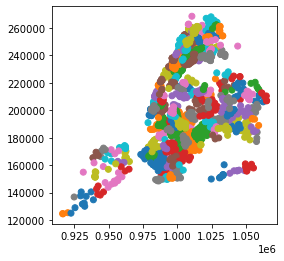

In [526]:
school_points_with_nta.plot(column='ntaname')

In [527]:
schools_count = school_points_with_nta.groupby(by='ntaname')['SCHOOLNAME'].count().reset_index().sort_values(by='SCHOOLNAME', ascending=False)

schools_count.rename(columns={"SCHOOLNAME": "school_count"}, inplace=True)

In [528]:
schools_count.head()

ntaname  school_count
22                        Brownsville            30
160                Stuyvesant Heights            28
50                  East Harlem South            28
45   East Concourse-Concourse Village            27
110            Mott Haven-Port Morris            27

In [529]:
nta_with_pop.head()

ntacode     shape_area county_fips        ntaname     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
1         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
2         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...    Queens   
3         3  MULTIPOLYGON (((998608.334 171942.436, 998339....  Brooklyn   
4         4  MULTIPOLYGON (((1051539.660 201007.013, 105192...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population        ft_sq  \
0  2010                47     BK88   Borough Park      106357 54005019.048   
1  2010                81     QN51    Murray Hill       51739 52488277.591   
2  2010                81     QN27  East Elmhurst       23150 19726946.569   
3  2010                47     BK95        Erasmus       29938 14522603.592   
4  2010                81     QN07         Hollis       20269 22887772.809   

   mi_sq  density (pop/mi_sq)  
0  1.937            54903.471  
1  1.883            27480.432  
2  0.708            32715.908  
3  0.521            57470.655  
4  0.821            24688.610

In [530]:
nta_with_schools_count = nta_with_pop.merge(schools_count, 
                                           left_on='NTA Name', 
                                           right_on='ntaname')

In [531]:
nta_with_schools_count.head()

ntacode     shape_area county_fips      ntaname_x     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
1         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
2         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...    Queens   
3         3  MULTIPOLYGON (((998608.334 171942.436, 998339....  Brooklyn   
4         4  MULTIPOLYGON (((1051539.660 201007.013, 105192...    Queens   

   Year  FIPS County Code NTA Code       NTA Name  Population        ft_sq  \
0  2010                47     BK88   Borough Park      106357 54005019.048   
1  2010                81     QN51    Murray Hill       51739 52488277.591   
2  2010                81     QN27  East Elmhurst       23150 19726946.569   
3  2010                47     BK95        Erasmus       29938 14522603.592   
4  2010                81     QN07         Hollis       20269 22887772.809   

   mi_sq  density (pop/mi_sq)      ntaname_y  school_count  
0  1.937            54903.471   Borough Park            13  
1  1.883            27480.432    Murray Hill             6  
2  0.708            32715.908  East Elmhurst             3  
3  0.521            57470.655        Erasmus             9  
4  0.821            24688.610         Hollis             5

In [532]:
nta_with_schools_count['schools_per_pop'] = (nta_with_schools_count['school_count'] 
                                             / nta_with_schools_count['Population'] * 10000)

nta_with_schools_count['schools_per_mi_sq'] = nta_with_schools_count['school_count'] / nta_with_schools_count['mi_sq']

nta_with_schools_count.head() 

ntacode     shape_area county_fips      ntaname_x     shape_leng boro_name  \
0    BK88   54005019.048         047   Borough Park  39247.2278309  Brooklyn   
1    QN51  52488277.5915         081    Murray Hill  33266.9048721    Queens   
2    QN27  19726845.5925         081  East Elmhurst  19816.7121316    Queens   
3    BK95  14522603.5915         047        Erasmus  18756.7018646  Brooklyn   
4    QN07  22887772.8087         081         Hollis  20976.3355996    Queens   

  boro_code                                           geometry   Borough  \
0         3  MULTIPOLYGON (((990897.900 169268.121, 990588....  Brooklyn   
1         4  MULTIPOLYGON (((1038593.459 221913.355, 103936...    Queens   
2         4  MULTIPOLYGON (((1022728.275 217530.808, 102305...    Queens   
3         3  MULTIPOLYGON (((998608.334 171942.436, 998339....  Brooklyn   
4         4  MULTIPOLYGON (((1051539.660 201007.013, 105192...    Queens   

   Year  ...  NTA Code       NTA Name Population        ft_sq  mi_sq  \
0  2010  ...      BK88   Borough Park     106357 54005019.048  1.937   
1  2010  ...      QN51    Murray Hill      51739 52488277.591  1.883   
2  2010  ...      QN27  East Elmhurst      23150 19726946.569  0.708   
3  2010  ...      BK95        Erasmus      29938 14522603.592  0.521   
4  2010  ...      QN07         Hollis      20269 22887772.809  0.821   

   density (pop/mi_sq)      ntaname_y school_count  schools_per_pop  \
0            54903.471   Borough Park           13            1.222   
1            27480.432    Murray Hill            6            1.160   
2            32715.908  East Elmhurst            3            1.296   
3            57470.655        Erasmus            9            3.006   
4            24688.610         Hollis            5            2.467   

   schools_per_mi_sq  
0              6.711  
1              3.187  
2              4.240  
3             17.277  
4              6.090  

[5 rows x 21 columns]

In [533]:
nta_with_schools_count.sort_values(by='schools_per_pop', ascending=False).head()

ntacode     shape_area county_fips                   ntaname_x  \
180    BK99  225339443.257         047  park-cemetery-etc-Brooklyn   
151    BX01  16451870.3771         005          Claremont-Bathgate   
123    BX75  16310644.2974         005           Crotona Park East   
141    MN06  10647077.7075         061              Manhattanville   
7      BX33  10732452.1794         005                    Longwood   

        shape_leng  boro_name boro_code  \
180  385534.318651   Brooklyn         3   
151  30053.1308249      Bronx         2   
123   24773.573674      Bronx         2   
141  17040.6858962  Manhattan         1   
7    18982.1296554      Bronx         2   

                                              geometry    Borough  Year  ...  \
180  MULTIPOLYGON (((1007822.043 152881.588, 100783...   Brooklyn  2010  ...   
151  MULTIPOLYGON (((1014572.350 250682.762, 101448...      Bronx  2010  ...   
123  MULTIPOLYGON (((1019225.582 245263.852, 101943...      Bronx  2010  ...   
141  MULTIPOLYGON (((999174.261 238490.105, 999084....  Manhattan  2010  ...   
7    MULTIPOLYGON (((1013354.947 240318.698, 101334...      Bronx  2010  ...   

     NTA Code                    NTA Name Population         ft_sq  mi_sq  \
180      BK99  park-cemetery-etc-Brooklyn        418 225338344.201  8.083   
151      BX01          Claremont-Bathgate      31078  16451969.553  0.590   
123      BX75           Crotona Park East      20277  16310701.436  0.585   
141      MN06              Manhattanville      22950  10647077.708  0.382   
7        BX33                    Longwood      26196  10732452.179  0.385   

     density (pop/mi_sq)                   ntaname_y school_count  \
180               51.714  park-cemetery-etc-Brooklyn            7   
151            52662.687          Claremont-Bathgate           26   
123            34657.634           Crotona Park East           15   
141            60092.478              Manhattanville           15   
7              68046.198                    Longwood           17   

     schools_per_pop  schools_per_mi_sq  
180          167.464              0.866  
151            8.366             44.058  
123            7.398             25.638  
141            6.536             39.276  
7              6.490             44.159  

[5 rows x 21 columns]

In [534]:
nta_with_schools_count.sort_values(by='Population').head()

ntacode     shape_area county_fips                        ntaname_x  \
180    BK99  225339443.257         047       park-cemetery-etc-Brooklyn   
105    MN99  91543352.7608         061      park-cemetery-etc-Manhattan   
13     BK93  11598952.3246         047                    Starrett City   
165    SI14  40931632.6387         085  Grasmere-Arrochar-Ft. Wadsworth   
119    SI35  47137243.9922         085         New Brighton-Silver Lake   

        shape_leng      boro_name boro_code  \
180  385534.318651       Brooklyn         3   
105  155354.846333      Manhattan         1   
13   17414.7824185       Brooklyn         3   
165  39960.9748864  Staten Island         5   
119  30320.3749453  Staten Island         5   

                                              geometry        Borough  Year  \
180  MULTIPOLYGON (((1007822.043 152881.588, 100783...       Brooklyn  2010   
105  MULTIPOLYGON (((981219.056 188655.316, 980940....      Manhattan  2010   
13   MULTIPOLYGON (((1015251.087 174914.561, 101524...       Brooklyn  2010   
165  MULTIPOLYGON (((961604.662 160174.839, 962652....  Staten Island  2010   
119  MULTIPOLYGON (((961009.798 170903.669, 960950....  Staten Island  2010   

     ...  NTA Code                         NTA Name Population         ft_sq  \
180  ...      BK99       park-cemetery-etc-Brooklyn        418 225338344.201   
105  ...      MN99      park-cemetery-etc-Manhattan       1849  91543547.102   
13   ...      BK93                    Starrett City      13354  11598988.779   
165  ...      SI14  Grasmere-Arrochar-Ft. Wadsworth      16079  40931437.222   
119  ...      SI35         New Brighton-Silver Lake      17525  47137265.432   

     mi_sq  density (pop/mi_sq)                        ntaname_y school_count  \
180  8.083               51.714       park-cemetery-etc-Brooklyn            7   
105  3.284              563.089      park-cemetery-etc-Manhattan            1   
13   0.416            32096.604                    Starrett City            3   
165  1.468            10951.406  Grasmere-Arrochar-Ft. Wadsworth            3   
119  1.691            10364.813         New Brighton-Silver Lake            3   

     schools_per_pop  schools_per_mi_sq  
180          167.464              0.866  
105            5.408              0.305  
13             2.247              7.211  
165            1.866              2.043  
119            1.712              1.774  

[5 rows x 21 columns]

In [535]:
nta_with_schools_count = nta_with_schools_count[~nta_with_schools_count['NTA Code'].isin(['BK99', 'MN99'])]

In [540]:
nta_with_schools_count.sort_values(by='schools_per_pop', ascending=False).head()

ntacode     shape_area county_fips  \
151    BX01  16451870.3771         005   
123    BX75  16310644.2974         005   
141    MN06  10647077.7075         061   
7      BX33  10732452.1794         005   
33     QN68  23317032.8329         081   

                                    ntaname_x     shape_leng  boro_name  \
151                        Claremont-Bathgate  30053.1308249      Bronx   
123                         Crotona Park East   24773.573674      Bronx   
141                            Manhattanville  17040.6858962  Manhattan   
7                                    Longwood  18982.1296554      Bronx   
33   Queensbridge-Ravenswood-Long Island City  27067.6525332     Queens   

    boro_code                                           geometry    Borough  \
151         2  MULTIPOLYGON (((1014572.350 250682.762, 101448...      Bronx   
123         2  MULTIPOLYGON (((1019225.582 245263.852, 101943...      Bronx   
141         1  MULTIPOLYGON (((999174.261 238490.105, 999084....  Manhattan   
7           2  MULTIPOLYGON (((1013354.947 240318.698, 101334...      Bronx   
33          4  MULTIPOLYGON (((1002384.940 220244.057, 100246...     Queens   

     Year  ...  NTA Code                                  NTA Name Population  \
151  2010  ...      BX01                        Claremont-Bathgate      31078   
123  2010  ...      BX75                         Crotona Park East      20277   
141  2010  ...      MN06                            Manhattanville      22950   
7    2010  ...      BX33                                  Longwood      26196   
33   2010  ...      QN68  Queensbridge-Ravenswood-Long Island City      20030   

           ft_sq  mi_sq  density (pop/mi_sq)  \
151 16451969.553  0.590            52662.687   
123 16310701.436  0.585            34657.634   
141 10647077.708  0.382            60092.478   
7   10732452.179  0.385            68046.198   
33  23317032.833  0.836            23948.345   

                                    ntaname_y school_count  schools_per_pop  \
151                        Claremont-Bathgate           26            8.366   
123                         Crotona Park East           15            7.398   
141                            Manhattanville           15            6.536   
7                                    Longwood           17            6.490   
33   Queensbridge-Ravenswood-Long Island City           11            5.492   

     schools_per_mi_sq  
151             44.058  
123             25.638  
141             39.276  
7               44.159  
33              13.152  

[5 rows x 21 columns]

(905464.73902893, 1075092.878585814, 112485.76062387296, 280480.4146435305)

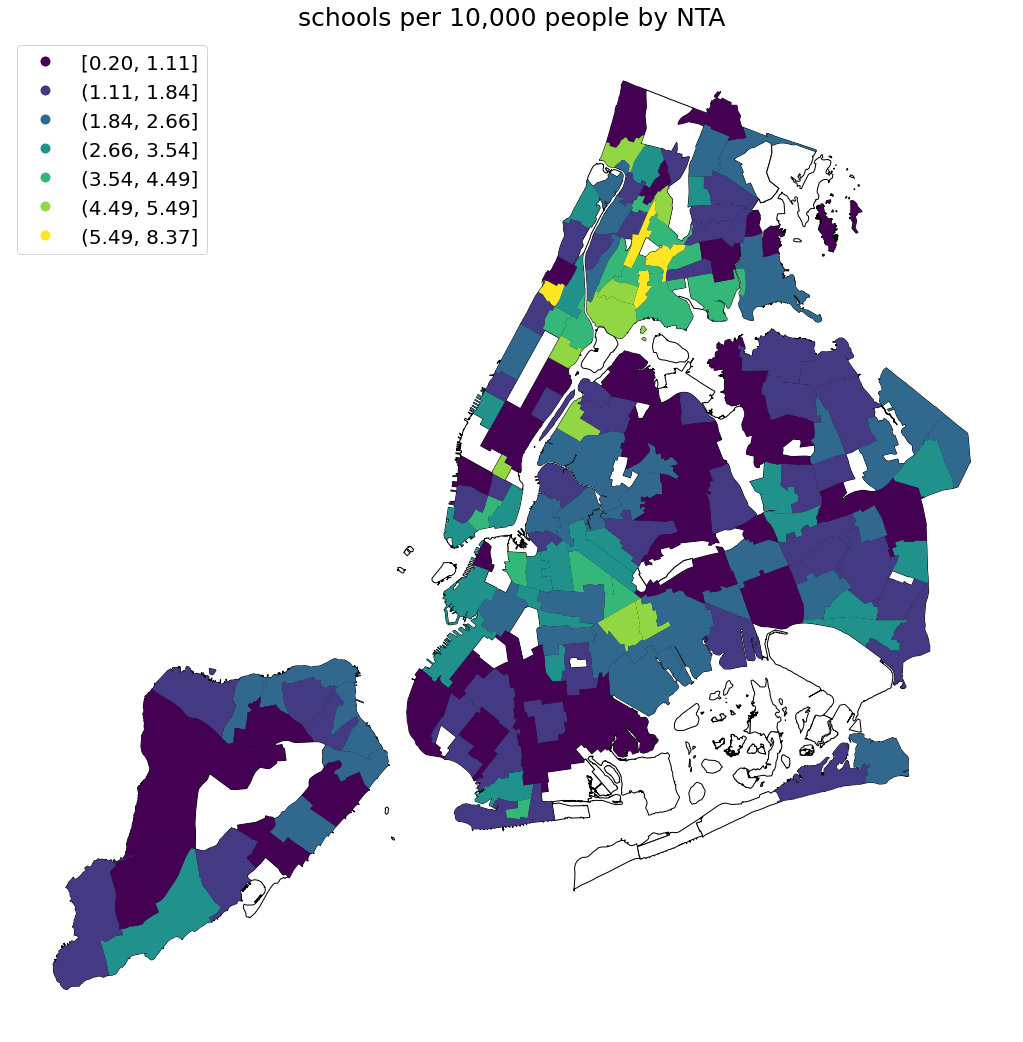

In [541]:
fig, ax = plt.subplots(figsize=(20,15))

nta_shape.plot(ax=ax, 
               color="white", 
               edgecolor='black', 
               zorder=1) 

nta_with_schools_count.plot(column='schools_per_pop', 
             ax=ax, 
             legend=True, 
             scheme='fisher_jenks',
             k = 7,
             legend_kwds={'loc': "upper left", 
                          'fmt': "{:,.2f}",
                          'fontsize': "20"})

ax.set_title('schools per 10,000 people by NTA', fontsize=25, pad=10)

plt.tight_layout()
plt.axis('off')

(905464.73902893, 1075092.878585814, 112485.76062387296, 280480.4146435305)

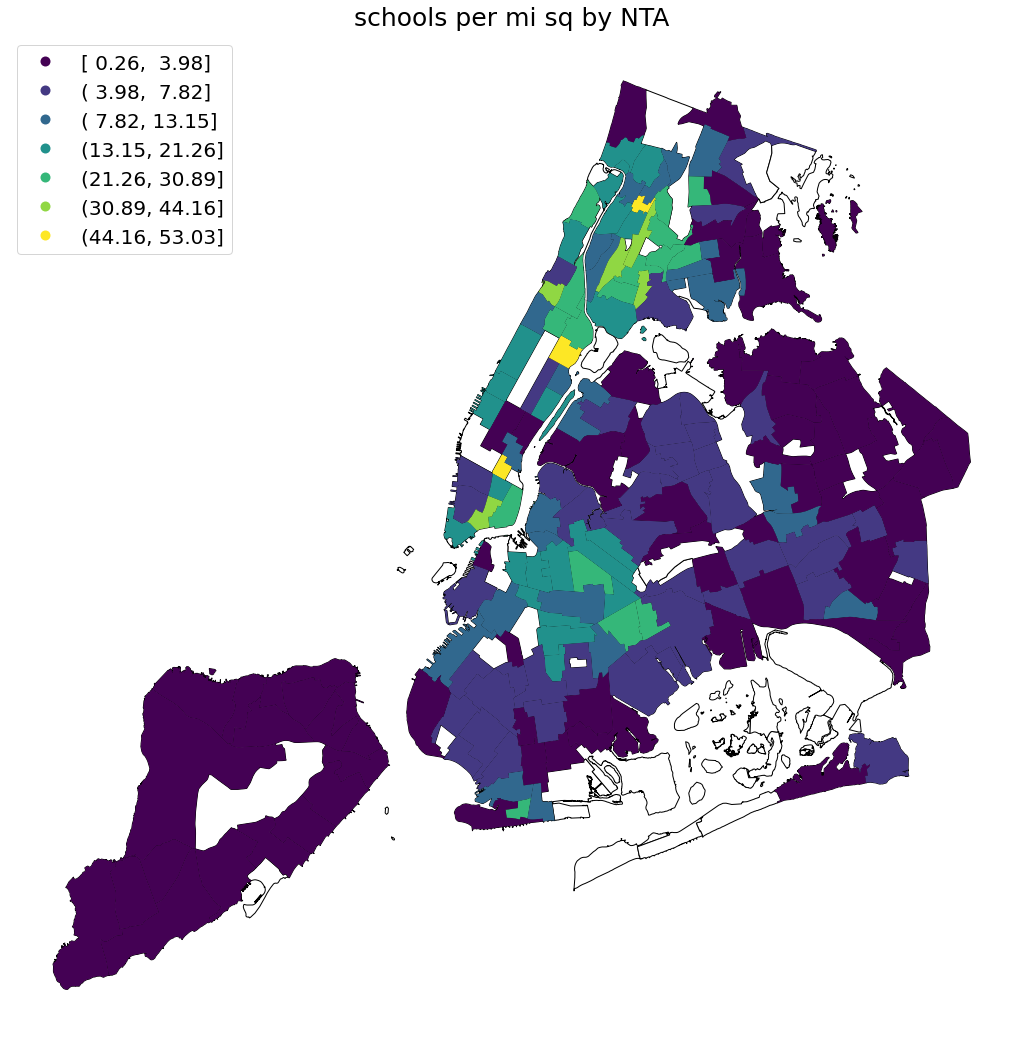

In [538]:
fig, ax = plt.subplots(figsize=(20,15))

nta_shape.plot(ax=ax, 
               color="white", 
               edgecolor='black', 
               zorder=1) 

nta_with_schools_count.plot(column='schools_per_mi_sq', 
             ax=ax, 
             legend=True, 
             scheme='fisher_jenks',
             k = 7,
             legend_kwds={'loc': "upper left", 
                          'fmt': "{:,.2f}",
                          'fontsize': "20"})

ax.set_title('schools per mi sq by NTA', fontsize=25, pad=10)

plt.tight_layout()
plt.axis('off')